In [92]:
%store -r df

 # Unsupervised Classification

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

# Get Vader data for sentiment analysis
import nltk
#nltk.download('vader_lexicon') 

# dictionary of colours for making nice plots later
COLOURS = {'after': '#E91D0E', 'before': '#00A6EF'}

%matplotlib inline



In [103]:
import seaborn as sns

def scatter(x, colors):
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    ax.scatter(x[(colors==0),0], x[(colors==0),1], c=COLOURS['after'], label='after', alpha=0.5)
    ax.scatter(x[(colors==1),0], x[(colors==1),1], c=COLOURS['before'], label='before', alpha=0.5)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    plt.legend()
    
    return f, ax



sample_before = df.loc[df['before_retraction'] == 1, ['sentences_citing', 'before_retraction']]#.sample(500)
sample_after = df.loc[df['before_retraction'] == 0, ['sentences_citing', 'before_retraction']]#.sample(500)
sample = sample_before.append(sample_after)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_vectors = tfidf_vectorizer.fit_transform(sample['sentences_citing'])

In [104]:
sample_after.shape

(31, 2)

# PCA

In [105]:
pca_vectors[1]

array([-3.58056703e-01, -6.17864788e-02, -6.94954539e-02,  7.65260140e-02,
       -1.80995510e-01,  2.23694629e-01,  1.43042645e-01, -6.68468111e-02,
       -2.20100844e-01,  1.83038720e-02,  2.59384744e-01,  3.93648954e-01,
        1.42233804e-01, -4.11088217e-02, -1.15128348e-01, -2.29113474e-01,
        7.19443275e-02, -1.76372536e-02, -1.12860916e-01, -5.16961234e-02,
       -9.75016984e-02,  1.00310448e-01,  1.37177907e-01, -1.45800489e-02,
        4.40938043e-02,  2.23111671e-01,  7.89289558e-02,  1.26393374e-01,
        4.05623205e-01, -2.71344423e-01,  2.91646988e-01, -6.98027238e-02,
       -1.02311425e-01,  5.04244536e-03, -3.16718196e-02,  8.67361738e-17,
        2.34187669e-16, -3.46944695e-17,  8.15320034e-17, -1.08420217e-16,
       -2.12503626e-17,  8.15320034e-17,  2.08166817e-17, -1.73472348e-18,
        6.24500451e-17,  3.46944695e-18,  1.01047642e-16, -7.82793969e-17,
       -3.46944695e-17,  7.11236625e-17,  6.24500451e-17, -6.93889390e-18,
        2.42861287e-17,  

(<matplotlib.figure.Figure at 0x7f4d5aad95c0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d5a333be0>)

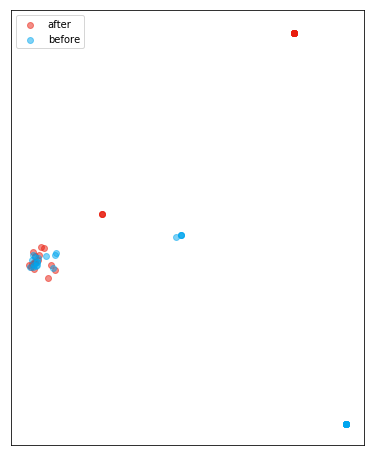

In [106]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(tfidf_vectors.toarray())

pca_vectors = pca.transform(tfidf_vectors.toarray())

scatter(pca_vectors, sample['before_retraction'])

# t-SNE

(<matplotlib.figure.Figure at 0x7f4d50f41320>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f4d50c9bba8>)

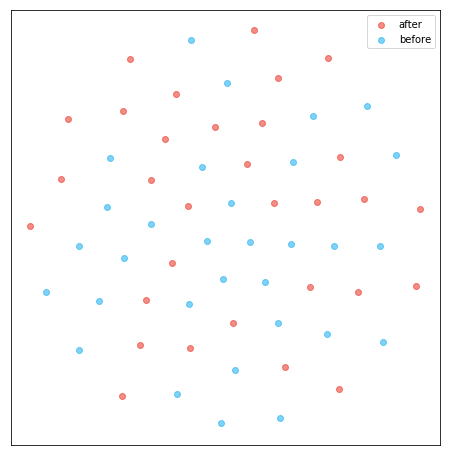

In [107]:
from sklearn.manifold import TSNE

# we have suggested some parameters below, feel free to experiment
tsne = TSNE(perplexity = 800, random_state = 42)

tsne_vectors = tsne.fit_transform(tfidf_vectors.toarray())

scatter(tsne_vectors, sample["before_retraction"])